<a href="https://colab.research.google.com/github/daniaguizap/daniaguizap/blob/main/Crane_performance_statistics_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NORMALITY TEST CRANE 14**



           Length
count   11.000000
mean   124.909091
std     95.671787
min     32.000000
25%     50.500000
50%    112.000000
75%    147.000000
max    359.000000
Box Plot Values:
Q1: 50.5, Q3: 147.0, IQR: 96.5
Lower Bound for Outliers: -94.25
Upper Bound for Outliers: 291.75

Rounded Number of classes: 4
class Range: 81.75


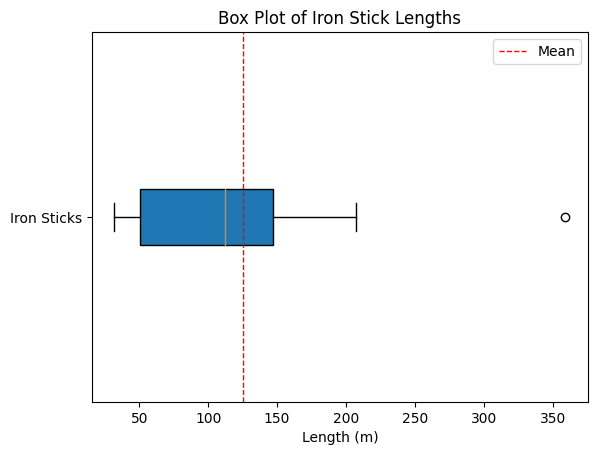

Classes:
   Length  Frequency
0  113.75          6
1  195.50          3
2  277.25          1
3  359.00          1 



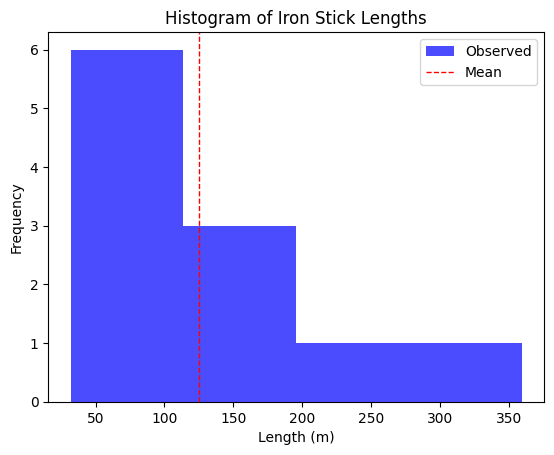

Chi-Square Table:
          χ^2
0    0.204740
1    0.065527
2    0.441663
3    0.409322
Sum  1.121253
Number of classes (bins) using Sturges' formula: 4
Chi-square Statistic: 1.1212525562486588, p-value: 0.2915171939863068


<ipython-input-1-23269f3af397>:108: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table_df = table_df.append(sum_row, ignore_index=True)


,CDF,Bin Frequency,Expected Value
0,0.453573,0.453573,4.989302
1,0.769696,0.316123,3.477349
2,0.944345,0.174649,1.921139
3,0.992794,0.048449,0.532941
4,Sum =,0.992794,11.000000


In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd


length_data = np.array([140, 140, 112, 90, 32, 154, 359, 207, 61, 39, 40])
length_df = pd.DataFrame(length_data, columns=['Length'])

# Using describe() to get most of the descriptive statistics
desc_stats = length_df.describe()
print(desc_stats)

# Calculating the boundaries for outliers
Q1 = length_df['Length'].quantile(0.25)
Q3 = length_df['Length'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Displaying the results
print("Box Plot Values:")
print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Lower Bound for Outliers: {lower_bound}")
print(f"Upper Bound for Outliers: {upper_bound}\n")

# Calculate mean and standard dviation
mean = np.mean(length_data)
std_dev = np.std(length_data, ddof=1)

# Calculate Sturges' number of bins
n = len(length_data)
k = int(1 + 3.322 * np.log10(n))
classrange=np.ptp(length_data)/k
print("Rounded Number of classes:",k)
print("class Range:",classrange)
# Histogram and expected frequencies
hist, bin_edges = np.histogram(length_data, bins=k)
cdf_values = stats.norm.cdf(bin_edges+classrange, mean, std_dev)


# Box plot
plt.boxplot(length_data, vert=False, patch_artist=True)
plt.axvline(mean, color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.title('Box Plot of Iron Stick Lengths')
plt.xlabel('Length (m)')
plt.yticks([1], ['Iron Sticks'])
plt.legend()
plt.show()

# Create a DataFrame for histogram data
hist_df = pd.DataFrame({'Length': bin_edges[:-1], 'Frequency': hist})

bin_frequencies = []
for i in range(0, len(cdf_values)-1):
    if i==0:
      frequency=cdf_values[0]
    else:
      frequency = cdf_values[i] - cdf_values[i - 1]
    bin_frequencies.append(frequency)
bin_frequencies= np.array(bin_frequencies)
# Expected values
expected_values = bin_frequencies * n

# Normalize expected frequencies
expected_frequencies_normalized = expected_values * (hist.sum() / expected_values.sum())

# Calculate chi-square values for each bin
chi_square_values = (hist - expected_values) ** 2 / expected_values
chi_square_df = pd.DataFrame({'χ^2': chi_square_values})
# Add a row for the sum of chi-square values
chi_square_df.loc['Sum'] = chi_square_df.sum()

# Chi-square goodness of fit test
chi_square_stat, p_value = stats.chisquare(hist, f_exp=expected_frequencies_normalized,ddof=2)
hist_df.Length=hist_df.Length+classrange
print("Classes:")
print(hist_df, "\n")
bin_centers = bin_edges[1:]

# Histogram
plt.hist(length_data, bins=bin_edges, alpha=0.7, color='blue', label='Observed')
plt.axvline(mean, color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.title('Histogram of Iron Stick Lengths')
plt.xlabel('Length (m)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

print("Chi-Square Table:")
print(chi_square_df)

# Combined table of CDF, Bin Frequency, and Expected Value
table_df = pd.DataFrame({
    'CDF': cdf_values[:-1],  # Exclude the last CDF value which is always 1
    'Bin Frequency': bin_frequencies,
    'Expected Value': expected_values
})

# Add a 'Sum' row at the end of the DataFrame
sum_row = pd.DataFrame({
    'CDF': ['Sum ='],
    'Bin Frequency': [bin_frequencies.sum()],
    'Expected Value': [expected_frequencies_normalized.sum()]
})

# Append the sum row to the table
table_df = table_df.append(sum_row, ignore_index=True)

# Print the results
print(f"Number of classes (bins) using Sturges' formula: {k}")
print(f"Chi-square Statistic: {chi_square_values.sum()}, p-value: {p_value}")


# Display the table
table_df

# **NORMALITY TEST CRANE 15**

           Length
count   22.000000
mean   142.954545
std    117.927531
min     14.000000
25%     48.500000
50%    100.000000
75%    234.750000
max    445.000000
Box Plot Values:
Q1: 48.5, Q3: 234.75, IQR: 186.25
Lower Bound for Outliers: -230.875
Upper Bound for Outliers: 514.125

Rounded Number of classes: 5
class Range: 86.2


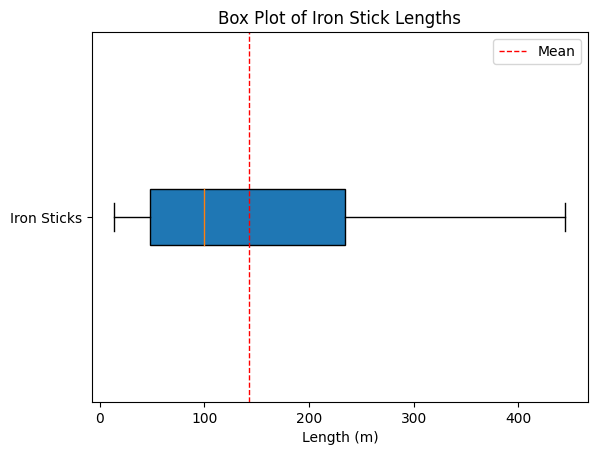

Classes:
   Length  Frequency
0   100.2         11
1   186.4          4
2   272.6          4
3   358.8          2
4   445.0          1 



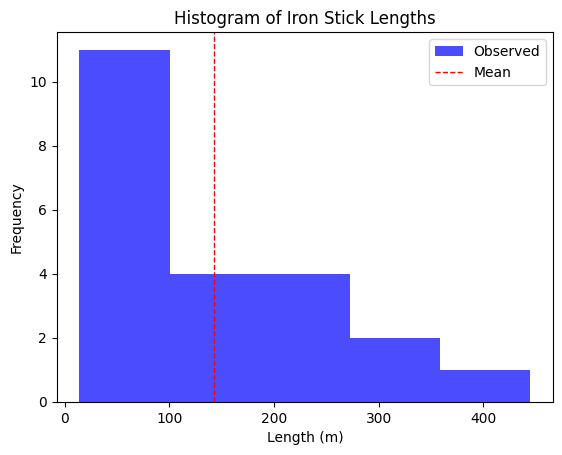

Chi-Square Table:
          χ^2
0    1.229309
1    0.825029
2    0.149149
3    0.027459
4    0.225777
Sum  2.456723
Number of classes (bins) using Sturges' formula: 5
Chi-square Statistic: 2.4567229984182286, p-value: 0.2947412885948147


<ipython-input-4-2157ae28f590>:108: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table_df = table_df.append(sum_row, ignore_index=True)


,CDF,Bin Frequency,Expected Value
0,0.358471,0.358471,7.886357
1,0.643716,0.285245,6.275384
2,0.864196,0.220480,4.850563
3,0.966399,0.102204,2.248477
4,0.994786,0.028386,0.624503
5,Sum =,0.994786,22.000000


In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd


length_data = np.array([69, 14, 38, 94, 46, 36, 84, 106, 269, 445, 42, 108, 244, 92, 148, 303, 24, 328, 207, 260, 132, 56])
length_df = pd.DataFrame(length_data, columns=['Length'])

# Using describe() to get most of the descriptive statistics
desc_stats = length_df.describe()
print(desc_stats)

# Calculating the boundaries for outliers
Q1 = length_df['Length'].quantile(0.25)
Q3 = length_df['Length'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Displaying the results
print("Box Plot Values:")
print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Lower Bound for Outliers: {lower_bound}")
print(f"Upper Bound for Outliers: {upper_bound}\n")

# Calculate mean and standard dviation
mean = np.mean(length_data)
std_dev = np.std(length_data, ddof=1)

# Calculate Sturges' number of bins
n = len(length_data)
k = int(1 + 3.322 * np.log10(n))
classrange=np.ptp(length_data)/k
print("Rounded Number of classes:",k)
print("class Range:",classrange)
# Histogram and expected frequencies
hist, bin_edges = np.histogram(length_data, bins=k)
cdf_values = stats.norm.cdf(bin_edges+classrange, mean, std_dev)


# Box plot
plt.boxplot(length_data, vert=False, patch_artist=True)
plt.axvline(mean, color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.title('Box Plot of Iron Stick Lengths')
plt.xlabel('Length (m)')
plt.yticks([1], ['Iron Sticks'])
plt.legend()
plt.show()

# Create a DataFrame for histogram data
hist_df = pd.DataFrame({'Length': bin_edges[:-1], 'Frequency': hist})

bin_frequencies = []
for i in range(0, len(cdf_values)-1):
    if i==0:
      frequency=cdf_values[0]
    else:
      frequency = cdf_values[i] - cdf_values[i - 1]
    bin_frequencies.append(frequency)
bin_frequencies= np.array(bin_frequencies)
# Expected values
expected_values = bin_frequencies * n

# Normalize expected frequencies
expected_frequencies_normalized = expected_values * (hist.sum() / expected_values.sum())

# Calculate chi-square values for each bin
chi_square_values = (hist - expected_values) ** 2 / expected_values
chi_square_df = pd.DataFrame({'χ^2': chi_square_values})
# Add a row for the sum of chi-square values
chi_square_df.loc['Sum'] = chi_square_df.sum()

# Chi-square goodness of fit test
chi_square_stat, p_value = stats.chisquare(hist, f_exp=expected_frequencies_normalized,ddof=2)
hist_df.Length=hist_df.Length+classrange
print("Classes:")
print(hist_df, "\n")
bin_centers = bin_edges[1:]

# Histogram
plt.hist(length_data, bins=bin_edges, alpha=0.7, color='blue', label='Observed')
plt.axvline(mean, color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.title('Histogram of Iron Stick Lengths')
plt.xlabel('Length (m)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

print("Chi-Square Table:")
print(chi_square_df)

# Combined table of CDF, Bin Frequency, and Expected Value
table_df = pd.DataFrame({
    'CDF': cdf_values[:-1],  # Exclude the last CDF value which is always 1
    'Bin Frequency': bin_frequencies,
    'Expected Value': expected_values
})

# Add a 'Sum' row at the end of the DataFrame
sum_row = pd.DataFrame({
    'CDF': ['Sum ='],
    'Bin Frequency': [bin_frequencies.sum()],
    'Expected Value': [expected_frequencies_normalized.sum()]
})

# Append the sum row to the table
table_df = table_df.append(sum_row, ignore_index=True)

# Print the results
print(f"Number of classes (bins) using Sturges' formula: {k}")
print(f"Chi-square Statistic: {chi_square_values.sum()}, p-value: {p_value}")


# Display the table
table_df

# **NORMALITY TEST CRANE 16**

           Length
count   17.000000
mean   116.294118
std     87.992730
min     26.000000
25%     47.000000
50%     90.000000
75%    151.000000
max    328.000000
Box Plot Values:
Q1: 47.0, Q3: 151.0, IQR: 104.0
Lower Bound for Outliers: -109.0
Upper Bound for Outliers: 307.0

Rounded Number of classes: 5
class Range: 60.4


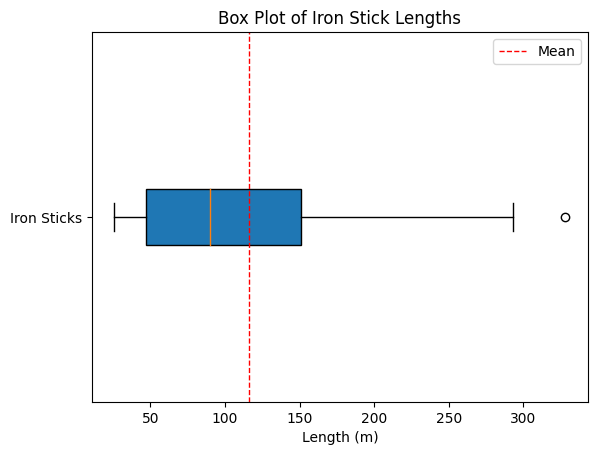

Classes:
   Length  Frequency
0    86.4          8
1   146.8          4
2   207.2          3
3   267.6          0
4   328.0          2 



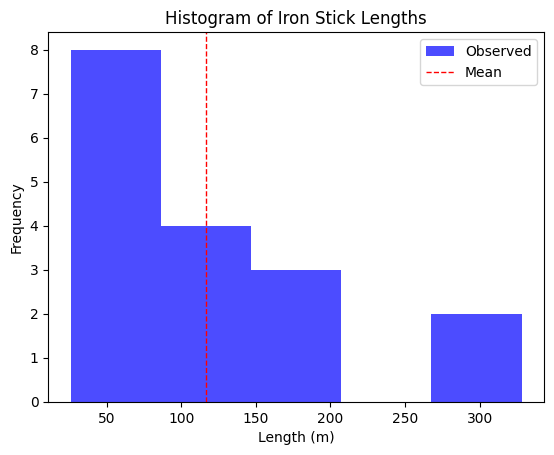

Chi-Square Table:
          χ^2
0    0.496743
1    0.070042
2    0.109916
3    1.836302
4    3.371794
Sum  5.884797
Number of classes (bins) using Sturges' formula: 5
Chi-square Statistic: 5.884796967233189, p-value: 0.05403548809661483


<ipython-input-2-ebe92d646187>:108: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table_df = table_df.append(sum_row, ignore_index=True)


,CDF,Bin Frequency,Expected Value
0,0.367028,0.367028,6.239484
1,0.635587,0.268558,4.565487
2,0.849223,0.213636,3.631820
3,0.957241,0.108018,1.836302
4,0.991935,0.034694,0.589797
5,Sum =,0.991935,17.000000


In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd


length_data = np.array([39, 135, 57, 31, 190, 90, 293, 151, 26, 77, 82, 156, 328, 92, 138, 47, 45])
length_df = pd.DataFrame(length_data, columns=['Length'])

# Using describe() to get most of the descriptive statistics
desc_stats = length_df.describe()
print(desc_stats)

# Calculating the boundaries for outliers
Q1 = length_df['Length'].quantile(0.25)
Q3 = length_df['Length'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Displaying the results
print("Box Plot Values:")
print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Lower Bound for Outliers: {lower_bound}")
print(f"Upper Bound for Outliers: {upper_bound}\n")

# Calculate mean and standard dviation
mean = np.mean(length_data)
std_dev = np.std(length_data, ddof=1)

# Calculate Sturges' number of bins
n = len(length_data)
k = int(1 + 3.322 * np.log10(n))
classrange=np.ptp(length_data)/k
print("Rounded Number of classes:",k)
print("class Range:",classrange)
# Histogram and expected frequencies
hist, bin_edges = np.histogram(length_data, bins=k)
cdf_values = stats.norm.cdf(bin_edges+classrange, mean, std_dev)


# Box plot
plt.boxplot(length_data, vert=False, patch_artist=True)
plt.axvline(mean, color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.title('Box Plot of Iron Stick Lengths')
plt.xlabel('Length (m)')
plt.yticks([1], ['Iron Sticks'])
plt.legend()
plt.show()

# Create a DataFrame for histogram data
hist_df = pd.DataFrame({'Length': bin_edges[:-1], 'Frequency': hist})

bin_frequencies = []
for i in range(0, len(cdf_values)-1):
    if i==0:
      frequency=cdf_values[0]
    else:
      frequency = cdf_values[i] - cdf_values[i - 1]
    bin_frequencies.append(frequency)
bin_frequencies= np.array(bin_frequencies)
# Expected values
expected_values = bin_frequencies * n

# Normalize expected frequencies
expected_frequencies_normalized = expected_values * (hist.sum() / expected_values.sum())

# Calculate chi-square values for each bin
chi_square_values = (hist - expected_values) ** 2 / expected_values
chi_square_df = pd.DataFrame({'χ^2': chi_square_values})
# Add a row for the sum of chi-square values
chi_square_df.loc['Sum'] = chi_square_df.sum()

# Chi-square goodness of fit test
chi_square_stat, p_value = stats.chisquare(hist, f_exp=expected_frequencies_normalized,ddof=2)
hist_df.Length=hist_df.Length+classrange
print("Classes:")
print(hist_df, "\n")
bin_centers = bin_edges[1:]

# Histogram
plt.hist(length_data, bins=bin_edges, alpha=0.7, color='blue', label='Observed')
plt.axvline(mean, color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.title('Histogram of Iron Stick Lengths')
plt.xlabel('Length (m)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

print("Chi-Square Table:")
print(chi_square_df)

# Combined table of CDF, Bin Frequency, and Expected Value
table_df = pd.DataFrame({
    'CDF': cdf_values[:-1],  # Exclude the last CDF value which is always 1
    'Bin Frequency': bin_frequencies,
    'Expected Value': expected_values
})

# Add a 'Sum' row at the end of the DataFrame
sum_row = pd.DataFrame({
    'CDF': ['Sum ='],
    'Bin Frequency': [bin_frequencies.sum()],
    'Expected Value': [expected_frequencies_normalized.sum()]
})

# Append the sum row to the table
table_df = table_df.append(sum_row, ignore_index=True)

# Print the results
print(f"Number of classes (bins) using Sturges' formula: {k}")
print(f"Chi-square Statistic: {chi_square_values.sum()}, p-value: {p_value}")


# Display the table
table_df

# **ONE WAY ANOVA**

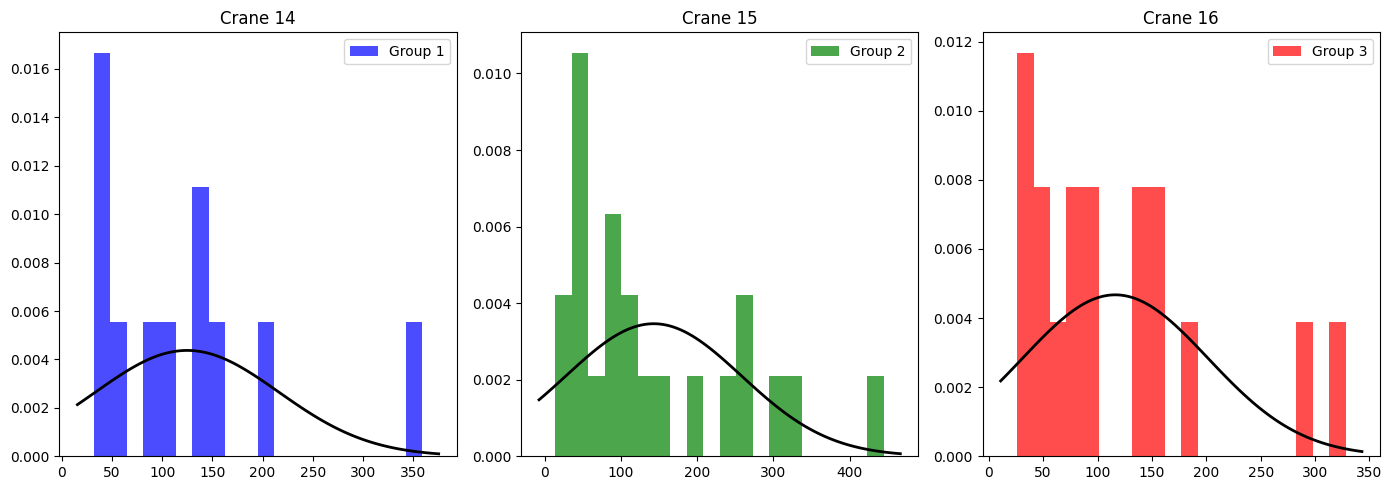

0.7191209750887233
No group mean is significantly different


In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Generating sample data
crane_14 = np.array([140, 140, 112, 90, 32, 154, 359, 207, 61, 39, 40])
crane_15 = np.array([69, 14, 38, 94, 46, 36, 84, 106, 269, 445, 42, 108, 244, 92, 148, 303, 24, 328, 207, 260, 132, 56])
crane_16 = np.array([39, 135, 57, 31, 190, 90, 293, 151, 26, 77, 82, 156, 328, 92, 138, 47, 45])

# Visualizing the generated numbers with histograms and fitting a normal distribution curve

# Plot histograms for each group
plt.figure(figsize=(14, 5))

# Group 1
plt.subplot(1, 3, 1)
plt.hist(crane_14, bins=20, color='blue', alpha=0.7, label='Group 1', density=True)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, np.mean(crane_14), np.std(crane_14))
plt.plot(x, p, 'k', linewidth=2)
plt.title('Crane 14')
plt.legend()

# Group 2
plt.subplot(1, 3, 2)
plt.hist(crane_15, bins=20, color='green', alpha=0.7, label='Group 2', density=True)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, np.mean(crane_15), np.std(crane_15))
plt.plot(x, p, 'k', linewidth=2)
plt.title('Crane 15')
plt.legend()

# Group 3
plt.subplot(1, 3, 3)
plt.hist(crane_16, bins=20, color='red', alpha=0.7, label='Group 3', density=True)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, np.mean(crane_16), np.std(crane_16))
plt.plot(x, p, 'k', linewidth=2)
plt.title('Crane 16')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


# Performing the One-Way ANOVA
anova_result = stats.f_oneway(crane_14, crane_15, crane_16)

print(anova_result.pvalue)

# Interpreting the result
if anova_result.pvalue < 0.05:
    print("At least one group mean is different")
else:
    print("No group mean is significantly different")

# **F TEST** between CRANE14 and CRANE15


In [ ]:
# Calculating variances
variance1 = np.var(crane_14, ddof=1)
variance2 = np.var(crane_15, ddof=1)

# Calculating the F-test statistic
f_value = variance1/variance2
print(f_value)
# Interpreting the result
if f_value > 1:
    print("Variance of crane_14 is greater than crane_15")
else:
    print("Variance of crane_15 is greater than crane_14")

df1 = len(crane_14) - 1
df2 = len(crane_15) - 1

# Calculate the p-value
p_value = stats.f.cdf(f_value, df1, df2)

# Print the results
print('Degree of freedom 1:',df1)
print('Degree of freedom 2:',df2)
print("F-statistic:", f_value)
print("p-value:", p_value)

0.6581689089273149
Variance of crane_15 is greater than crane_14
Degree of freedom 1: 10
Degree of freedom 2: 21
F-statistic: 0.6581689089273149
p-value: 0.250908008929429


# **T Test** between CRANE 14 and CRANE 15


In [ ]:
# Performing the 2-Sample t-test
t_test_result = stats.ttest_ind(crane_14, crane_15)
print(t_test_result.pvalue)
# Interpreting the result
if t_test_result.pvalue < 0.05:
    print("Means are significantly different")
else:
    print("Means are not significantly different")

0.6634821772072074
Means are not significantly different


# **F TEST** between CRANE 14 and CRANE 16

In [ ]:
# Calculating variances
variance1 = np.var(crane_14, ddof=1)
variance2 = np.var(crane_16, ddof=1)

# Calculating the F-test statistic
f_value = variance1/variance2
print(f_value)
# Interpreting the result
if f_value > 1:
    print("Variance of crane_14 is greater than crane_16")
else:
    print("Variance of crane_16 is greater than crane_14")

df1 = len(crane_14) - 1
df2 = len(crane_16) - 1

# Calculate the p-value
p_value = stats.f.cdf(f_value, df1, df2)

# Print the results
print('Degree of freedom 1:',df1)
print('Degree of freedom 2:',df2)
print("F-statistic:", f_value)
print("p-value:", p_value)

1.18215436096178
Variance of crane_14 is greater than crane_16
Degree of freedom 1: 10
Degree of freedom 2: 16
F-statistic: 1.18215436096178
p-value: 0.630744216873175


# **T TEST** between CRANE 14 and CRANE 16

In [ ]:
# Performing the 2-Sample t-test
t_test_result = stats.ttest_ind(crane_14, crane_16)
print(t_test_result.pvalue)
# Interpreting the result
if t_test_result.pvalue < 0.05:
    print("Means are significantly different")
else:
    print("Means are not significantly different")

0.80869121128378
Means are not significantly different


# **F TEST** between CRANE 15 and CRANE 16

In [ ]:
# Calculating variances
variance1 = np.var(crane_15, ddof=1)
variance2 = np.var(crane_16, ddof=1)

# Calculating the F-test statistic
f_value = variance1/variance2
print(f_value)
# Interpreting the result
if f_value > 1:
    print("Variance of crane_15 is greater than crane_16")
else:
    print("Variance of crane_16 is greater than crane_15")

df1 = len(crane_15) - 1
df2 = len(crane_16) - 1

# Calculate the p-value
p_value = stats.f.cdf(f_value, df1, df2)

# Print the results
print('Degree of freedom 1:',df1)
print('Degree of freedom 2:',df2)
print("F-statistic:", f_value)
print("p-value:", p_value)

1.7961261082485005
Variance of crane_15 is greater than crane_16
Degree of freedom 1: 21
Degree of freedom 2: 16
F-statistic: 1.7961261082485005
p-value: 0.882157452066947


# **T TEST** between CRANE 15 and CRANE 16

In [ ]:
# Performing the 2-Sample t-test
t_test_result = stats.ttest_ind(crane_15, crane_16)
print(t_test_result.pvalue)
# Interpreting the result
if t_test_result.pvalue < 0.05:
    print("Means are significantly different")
else:
    print("Means are not significantly different")

0.4411167523228311
Means are not significantly different
